In [1]:
from collections import defaultdict
import pandas as pd
# read data
df = pd.read_csv("logins.txt", sep="\t", parse_dates=[[0,1]], header=None, dtype_backend="pyarrow")
# rename cols
df.columns = ["datetime", "uname", "login"]
# split names
df[["First Letter", "Name"]] = df["uname"].str.split(".", expand=True)
df["month"] = df["datetime"].dt.month
# df = df["2021-06-01":]


In [13]:
df['time'] = (df["datetime"].astype("int64") - df["datetime"].dt.normalize().astype("int64"))//36e9

In [31]:

adf= df[df["month"]>6]
nd = defaultdict(dict)
# adf['time'] = (adf["datetime"].astype("int64") - adf["datetime"].dt.normalize().astype("int64"))//36e9
for n, grp in df.groupby("uname"):
    lins = grp[grp["login"]=="IN"]
    nd[n]= lins[grp["month"]>6]['time'].var(), lins[grp["month"]<6]['time'].var()


C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\3286408372.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd[n]= lins[grp["month"]>6]['time'].var(), lins[grp["month"]<6]['time'].var()
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\3286408372.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd[n]= lins[grp["month"]>6]['time'].var(), lins[grp["month"]<6]['time'].var()
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\3286408372.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd[n]= lins[grp["month"]>6]['time'].var(), lins[grp["month"]<6]['time'].var()
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\3286408372.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nd[n]= lins[grp["month"]>6]['time'].var(), lins[grp["month"]<6]['time'].var()
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\3286408372.py:6: UserWarning: Boolean Series key will be r

In [21]:
pm = pd.DataFrame(nd)

In [36]:
mlp = pm.var().dropna().sort_values(ascending=True).head(20).index

In [8]:
jdf= adf[adf["month"]==7]
nd = defaultdict(dict)
# jdf['time'] = (jdf["datetime"].astype("int64") - jdf["datetime"].dt.normalize().astype("int64"))//36e9
for n, grp in jdf.groupby("uname"):
    if len(grp) < 10:
        continue
    nd[n]= grp[grp["login"]=="IN"]['time'].var()

C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\902137125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jdf['time'] = (jdf["datetime"].astype("int64") - jdf["datetime"].dt.normalize().astype("int64"))//36e9


In [17]:
pm = pd.Series(nd)
pm.sort_values()

d.tye              0.000000
w.despres         14.544444
s.davis           17.450514
m.hicks           17.614943
c.finklea         17.714272
                  ...      
t.trask       420454.005802
c.faltus      423555.192842
s.nguyen      439610.716524
g.norman                NaN
j.arbeiter              NaN
Length: 6189, dtype: float64

In [19]:
pm.nsmallest(50)

d.tye            0.000000
w.despres       14.544444
s.davis         17.450514
m.hicks         17.614943
c.finklea       17.714272
j.106           17.799696
s.culp          17.920401
b.pyle          18.170365
a.29            18.313037
l.lajara        18.352044
m.barnard       18.521994
j.99            18.624224
t.graham        18.690872
a.peffley       18.699640
s.alldredge     18.713622
t.acheson       18.731444
j.pennington    18.856708
j.85            18.905023
r.41            18.966288
a.mcclean       18.998408
j.croom         19.005857
r.virgil        19.016779
j.aguilar       19.034772
r.watts         19.046473
k.peterson      19.065136
r.girman        19.161194
j.135           19.161522
m.54            19.180149
j.park          19.241140
a.cooper        19.244876
w.archer        19.266935
g.fish          19.272230
c.sutton        19.281046
m.baldwin       19.296732
r.tillman       19.300114
a.robins        19.313022
r.51            19.319635
s.bassani       19.330230
j.hogan     

C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\727906328.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asdf= df[df['login']=="IN"][df["uname"]==nam]
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\727906328.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asdf= df[df['login']=="IN"][df["uname"]==nam]
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\727906328.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asdf= df[df['login']=="IN"][df["uname"]==nam]
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\727906328.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asdf= df[df['login']=="IN"][df["uname"]==nam]
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\727906328.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  asdf= df[df['login']=="IN"][df["uname"]==nam]
C:\Users\Morri\AppData\Local\Temp\ipykernel_15440\

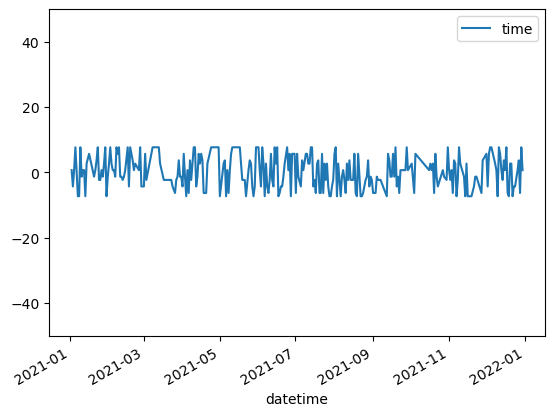

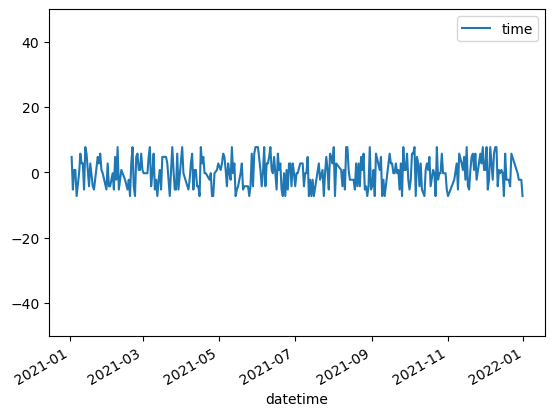

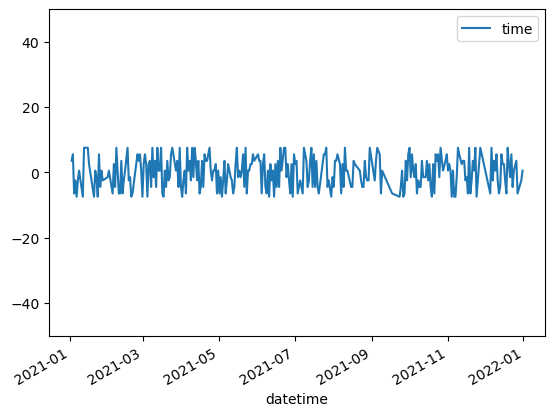

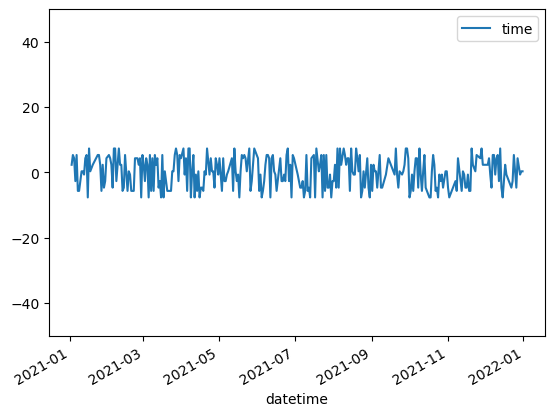

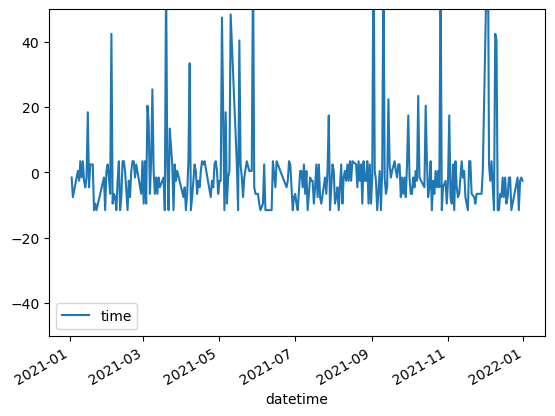

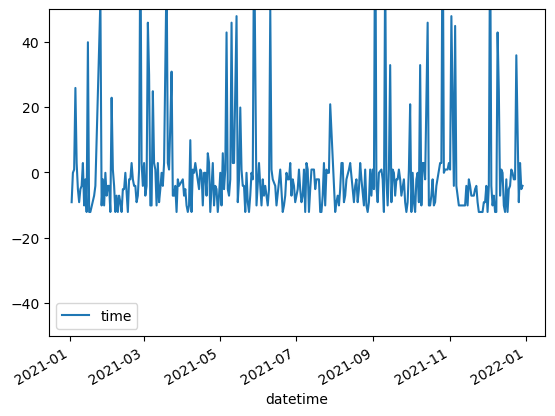

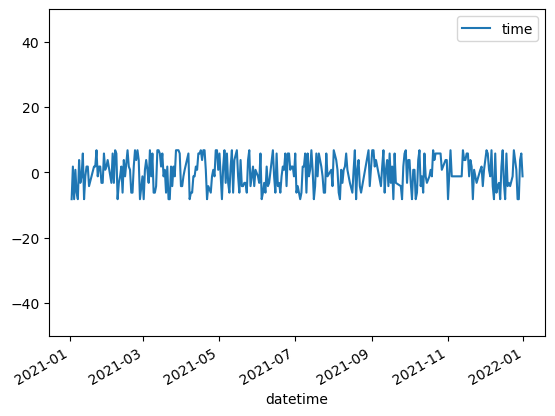

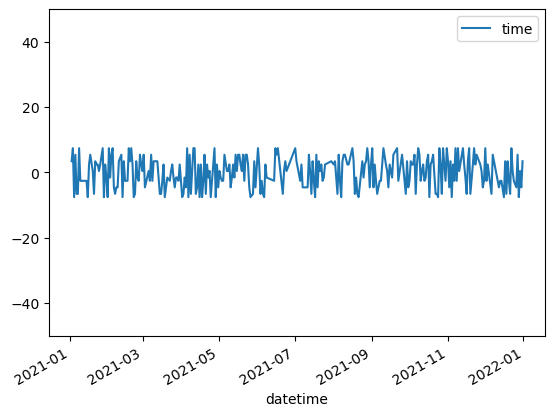

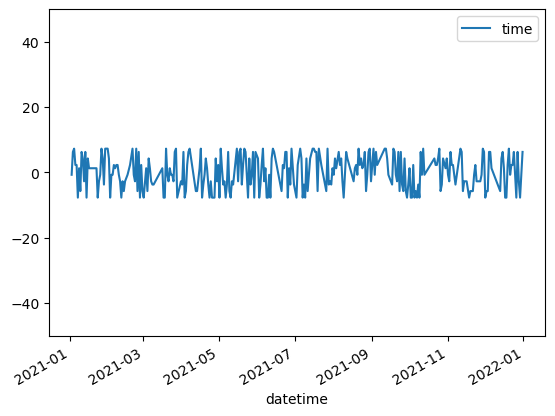

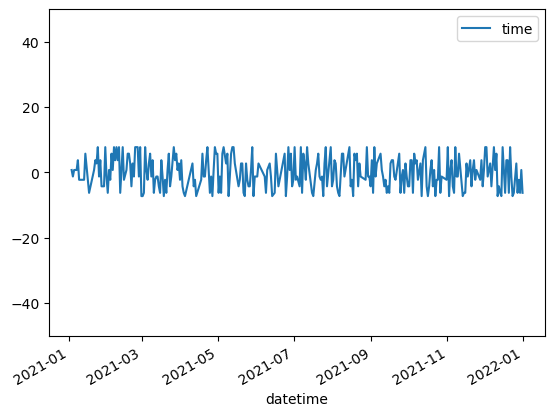

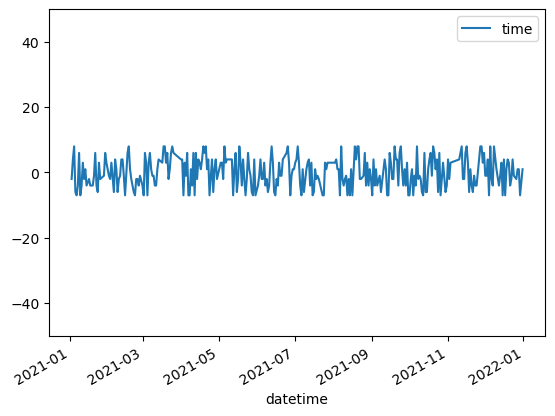

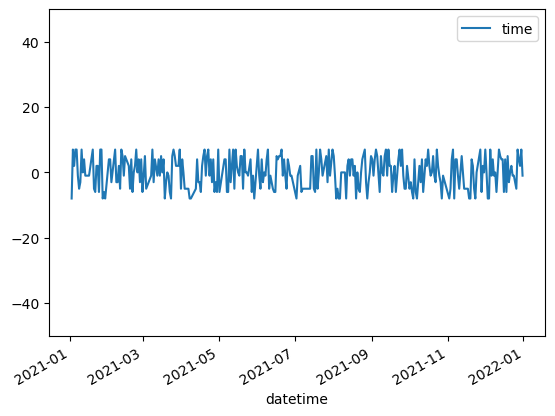

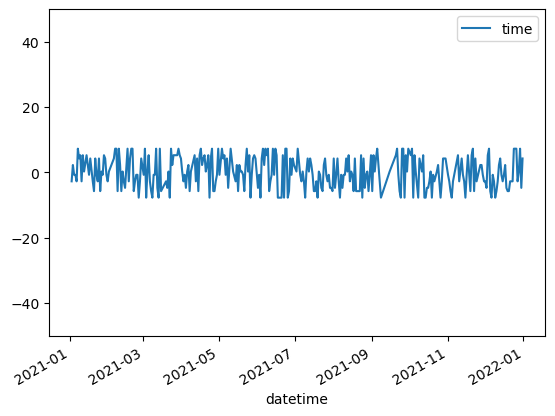

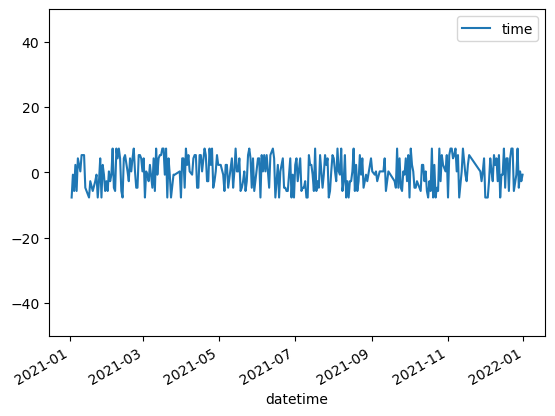

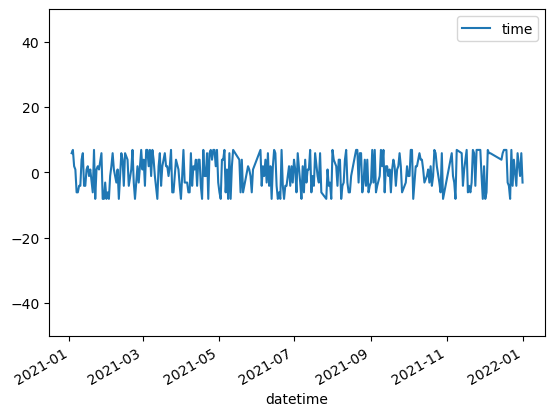

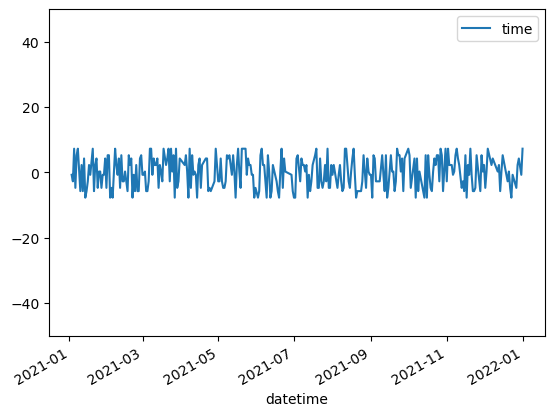

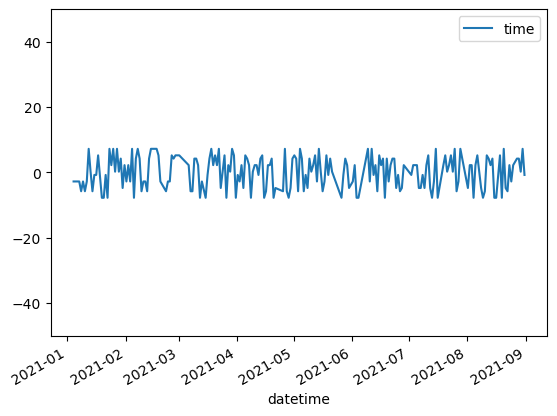

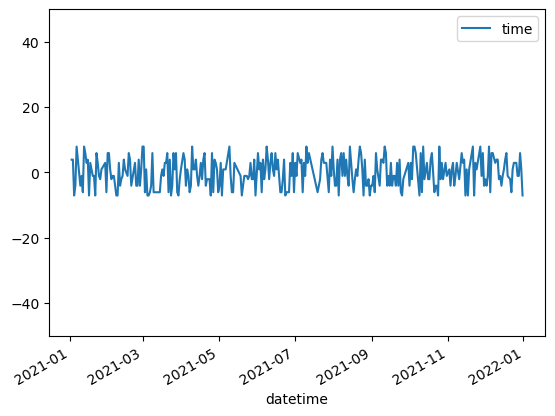

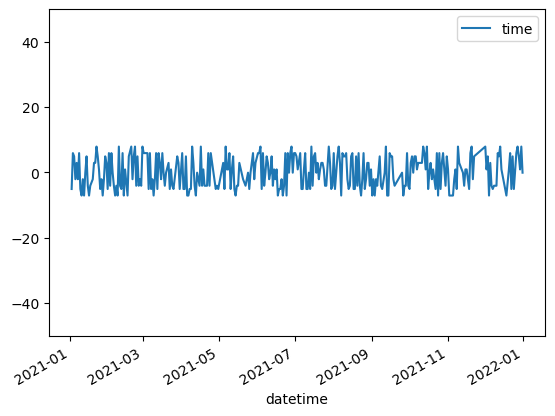

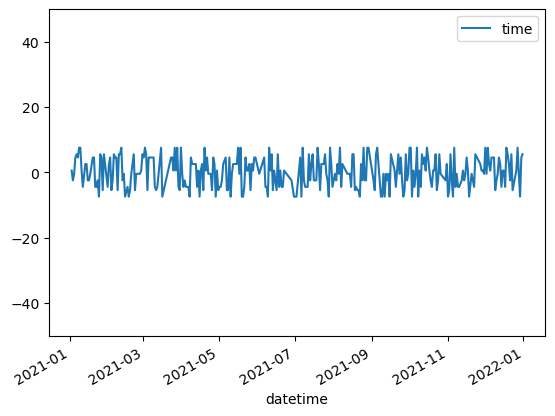

In [42]:
for nam in mlp:
    asdf= df[df['login']=="IN"][df["uname"]==nam]
    asdf.loc[asdf["month"]==7]
    asdf['time'] -= asdf['time'].mean()
    asdf.plot(x="datetime",y="time",ylim=[-50, 50])
# df.plot()